# **Part A:  Baseline Model and Data Analysis**

## **1. Load the Dataset**

In this subsection, we will:
- Load the `creditcard.csv` dataset.
- Display its structure and check for missing values.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.mixture import GaussianMixture
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [3]:

# Load the dataset 
df = pd.read_csv(r"E:\STUDY MATERIALS\IIT MADRAS\SEMESTER 1\DAL Lab\Assignment\Assignment 4\DATASET\creditcard.csv")

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Inference:
- The dataset contains **284,807 rows** and **31 columns**.  
- Features `V1` to `V28` are PCA-transformed components.  
- `Time` represents elapsed seconds from the first transaction.  
- `Amount` is the transaction amount.  
- `Class` is the target variable (0 = Legitimate, 1 = Fraud).  
- No missing values are present.  

In [4]:
# Preview first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Inference:
The preview confirms:
- PCA-transformed features (`V1`–`V28`).  
- `Amount` and `Time` columns are kept as it is.  
- `Class` is highly imbalanced, which we will analyze in detail in the next subsection.  

## **2. Analyze Class Distribution**

In this subsection, we will:
- Print the counts of fraudulent vs. non-fraudulent transactions.
- Calculate percentages of each class.
- Visualize the imbalance using a pie chart.
- Clearly state the degree of imbalance.

In [5]:
# Class distribution (counts and percentages)
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("Class Distribution (Counts):")
print(class_counts)
print("\nClass Distribution (Percentages):")
print(class_percentages)

Class Distribution (Counts):
Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution (Percentages):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


### Inference:
- Legitimate transactions (`Class = 0`) ≈ **99.83%**.  
- Fraudulent transactions (`Class = 1`) ≈ **0.17%**.  
- This shows a **severe class imbalance**, making fraud detection challenging.

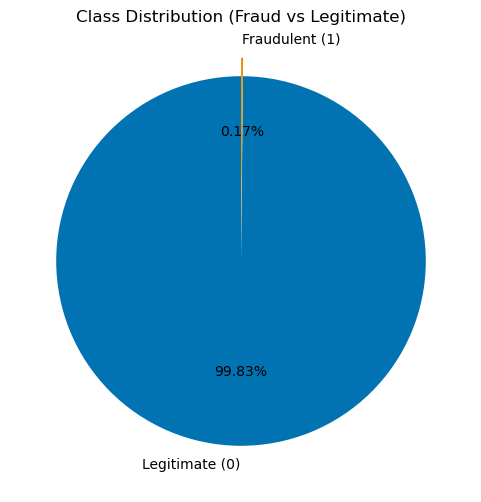

In [6]:
# Pie chart for class distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Use colorblind-friendly palette
colors = sns.color_palette("colorblind")

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['Legitimate (0)', 'Fraudulent (1)'],
        autopct='%1.2f%%', colors=colors, startangle=90, explode=[0,0.1])
plt.title("Class Distribution (Fraud vs Legitimate)")
plt.show()

### Inference:
- The dataset is **extremely imbalanced**.  
- Only a very small fraction of transactions are fraudulent (~0.17%).  
- If a naive classifier predicts all transactions as legitimate, it would still achieve >99% accuracy, but fail to detect fraud.  
- This highlights the need for specialized resampling techniques, which will be addressed later in the assignment.  


## **3. Baseline Model**

In this subsection, we will:
1. Split the dataset into training and testing sets.
2. Train a **Logistic Regression** classifier on the imbalanced training data.
3. Evaluate the model on the imbalanced test set using:
   - Precision
   - Recall
   - F1-score
   - ROC-AUC  
   (instead of Accuracy, which is misleading in imbalanced datasets).


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

#scaling amount and time coloumns
scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])
X["Time"] = scaler.fit_transform(X[["Time"]])

# Split into train (70%) and test (30%) - stratify ensures class proportions are maintained
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nClass distribution in Training set:\n", y_train.value_counts(normalize=True) * 100)
print("\nClass distribution in Testing set:\n", y_test.value_counts(normalize=True) * 100)

Training set size: (227845, 30)
Testing set size: (56962, 30)

Class distribution in Training set:
 Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

Class distribution in Testing set:
 Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


### Inference:
- Both training and testing sets retain the original imbalance (~99.83% legitimate, ~0.17% fraud).  
- This ensures our evaluation mimics real-world fraud detection, where fraudulent cases are extremely rare.

In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with class_weight=None (to reflect imbalance)
log_reg = LogisticRegression(max_iter=200, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

### Inference:
We trained a Logistic Regression model (Model 1) directly on the **imbalanced data**, without applying any resampling.  
This serves as the **baseline** for comparison against balanced approaches later (SMOTE, CBO, CBU).  

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


Classification Report:

              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962

ROC-AUC Score: 0.9572835078037969


### Inference :

From the classification report and ROC-AUC score:

- **Accuracy**: 99.91% – very high, but misleading since it mostly reflects correct classification of legitimate transactions (class 0).  
- **Legitimate Transactions (Class 0)**:  
  - Precision = 0.9993, Recall = 0.9998, F1-score = 0.9996.  
  - The model is nearly perfect at detecting legitimate cases.  

- **Fraudulent Transactions (Class 1)**:  
  - Precision = 0.8273 → When the model predicts fraud, only ~82.7% are truly fraud.  
  - Recall = 0.6149 → The model only detects ~61.5% of all actual fraud cases, meaning many frauds are missed.  
  - F1-score = 0.7054 → The overall balance between precision and recall is weak.  

- **Macro Average**: F1-score = 0.8525, showing performance imbalance between classes.  
- **ROC-AUC Score**: 0.9295, indicating decent separation ability overall, but recall for fraud is still unsatisfactory.  

⚠️ **Key Insight:**  
Despite excellent accuracy and performance on legitimate transactions, the model struggles with fraud detection (class 1). The recall of 61.5% means nearly 4 out of 10 fraudulent transactions are missed, which is unacceptable in real-world fraud detection. This highlights why **accuracy is misleading**, and why metrics like **recall, F1-score, and ROC-AUC** are more reliable for imbalanced problems.  


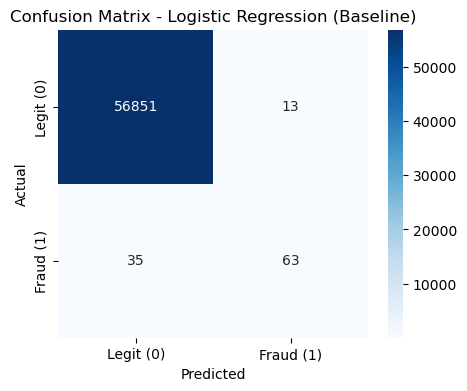

In [10]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Legit (0)','Fraud (1)'], 
            yticklabels=['Legit (0)','Fraud (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Baseline)")
plt.show()


### Inference:
- Many fraudulent transactions are misclassified as legitimate.  
- The confusion matrix reveals that the model is **dominated by the majority class**.  
- This confirms that accuracy alone cannot be trusted, and specialized techniques (SMOTE, CBO, CBU) are needed to improve fraud detection.  

# **Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling**

## **1. Theoretical Foundation**

In imbalanced datasets such as fraud detection, the minority class (fraudulent transactions) is severely underrepresented compared to the majority class (non-fraudulent transactions).  
This imbalance makes it difficult for classifiers to learn meaningful patterns for the minority class.

**Traditional oversampling (e.g., SMOTE):**
- **SMOTE (Synthetic Minority Oversampling Technique)** generates synthetic samples by drawing a line between two minority class samples and interpolating a point along that line.  
- Advantage: Simple and effective for linear or near-linear minority distributions.  
- Limitation: It does not model the underlying probability distribution. When the minority class is multimodal (i.e., has multiple clusters), SMOTE may generate unrealistic samples that lie in sparse regions, introducing noise and reducing classifier performance.

**Gaussian Mixture Model (GMM)-based sampling:**
- A **GMM** assumes that the data distribution is a weighted sum of several Gaussian distributions (called mixture components).  
- Each component captures a local cluster (or sub-population) of the minority class.  
- When the minority class contains multiple fraud patterns , a GMM can represent each group separately.
- Sampling from the GMM involves:
  1. Randomly choosing a Gaussian component based on its learned weight.  
  2. Drawing a sample from the corresponding Gaussian distribution.  
- This results in **synthetic samples that are statistically consistent with the original minority distribution**, preserving its complex structure.

**Why GMM is theoretically better for complex minority distributions:**
1. **Captures multimodality:** Fraud cases may come from different behavioral patterns. GMM can model each subgroup separately, whereas SMOTE ignores such clusters.  
2. **Probabilistic framework:** GMM provides a likelihood-based generative process, ensuring new samples reflect the true density of the minority class.  
3. **Flexibility in shapes:** Unlike SMOTE, which assumes linear interpolation is valid, GMM handles ellipsoidal clusters and overlapping regions.  
4. **Avoids noisy samples:** Since GMM respects the learned distribution, it reduces the chance of generating samples in unrealistic regions of the feature space.  

In summary, while SMOTE provides a heuristic oversampling strategy, **GMM-based synthetic sampling is a model-based generative approach**. This makes it more suitable for fraud detection, where the minority class has **multiple sub-structures** and requires more realistic synthetic examples.



## **2. GMM Implementation**


In this step, we fit a **Gaussian Mixture Model (GMM)** to the **minority class training data**.  

- We only use `X_minority` (minority samples) since we want to model its distribution.  
- The **optimal number of components (k)** is determined by comparing models with different `k` values using **Akaike Information Criterion (AIC)** and **Bayesian Information Criterion (BIC)**.  
- The model with the lowest AIC/BIC is chosen, since it best balances **goodness of fit** and **model complexity**.  


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

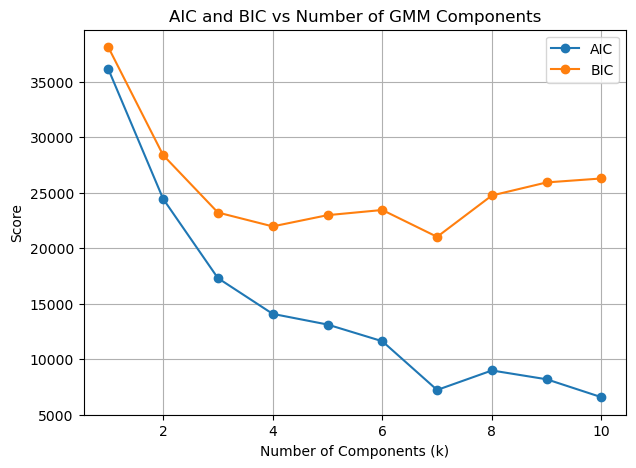

In [12]:
# divide data into majority and minority class

X_train_minority = X_train[y_train == 1]
X_train_majority = X_train[y_train == 0]
y_train_minority = y_train[y_train == 1]
y_train_majority = y_train[y_train == 0]

# choosing optimal value of k

k_range = range(1,11)

aic_scores = []
bic_scores = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', n_init=10, random_state=42)
    gmm.fit(X_train_minority)
    
    aic_scores.append(gmm.aic(X_train_minority))
    bic_scores.append(gmm.bic(X_train_minority))

plt.figure(figsize=(7, 5))
plt.plot(k_range, aic_scores, marker='o', label='AIC')
plt.plot(k_range, bic_scores, marker='o', label='BIC')
plt.xlabel("Number of Components (k)")
plt.ylabel("Score")
plt.title("AIC and BIC vs Number of GMM Components")
plt.legend()
plt.grid(True)
plt.show()


**Inference :**

From the AIC and BIC curves, we observe that:

- The **AIC score** and **BIC score** fall sharply at k=7 , therefore we choose k=7


We fit a final GMM using the chosen k and sample new fraud points until the 
minority class size matches the majority class size.


In [49]:
gmm1 = GaussianMixture(n_components = 7, covariance_type='full', n_init=10, random_state=42)
gmm1.fit(X_train_minority)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

GaussianMixture(n_components=7, n_init=10, random_state=42)

## **3. Synthetic Data Generation**

To generate synthetic samples, we exploit the probabilistic nature of the GMM:

1. Component selection – For each synthetic sample, we randomly select a Gaussian component based on the learned mixture weights (probabilities).

2. Sampling from Gaussian – Once a component is chosen, we draw a random vector from its multivariate normal distribution defined by the component’s mean and covariance.

3. Repeat – This process is repeated until the required number of synthetic samples is generated.

This approach ensures that synthetic samples are distributed across all high-density regions of the minority class, respecting cluster boundaries and avoiding the interpolation artifacts common in simpler methods like SMOTE.

In [50]:
n_minority = X_train_minority.shape[0]
n_majority = (y_train == 0).sum()
n_to_generate = n_majority - n_minority   # balance the dataset

# Generate synthetic samples in scaled space
X_synthetic, _ = gmm1.sample(n_to_generate)

# Create corresponding labels
y_synthetic = np.full(shape = n_to_generate, fill_value = 1)

# Combine with original training data
X_train_balanced = np.concatenate([X_train, X_synthetic] , axis = 0)
y_train_balanced = np.concatenate([y_train, y_synthetic] , axis = 0)

print("Original dataset shape:", X_train.shape, y_train.shape)
print("Balanced dataset shape:", X_train_balanced.shape, y_train_balanced.shape)

Original dataset shape: (227845, 30) (227845,)
Balanced dataset shape: (454902, 30) (454902,)


In [51]:
print (pd.Series(y_train_balanced).value_counts())

0    227451
1    227451
Name: count, dtype: int64


## **4 .Resampliong with CBU**

### Selecting a Suitable Population for the Majority Class

1. **Extreme imbalance ( > 1:100 )** – The minority class is too sparse, making it difficult for the model to capture meaningful patterns. This often leads to unrealistic synthetic samples and persistent classifier bias.

2. **Moderate imbalance ( ≈ 1:10 )** – The minority class has sufficient representation for Gaussian Mixture Models (GMM) to capture real sub-clusters, enabling more effective oversampling.

3. **Low imbalance ( < 1:5 )** – Oversampling remains applicable, but its benefit is limited. In such cases, the improvement over SMOTE or even using the dataset without resampling is often marginal.


- Therefore, since there are more than 400 minority samples in the training dataset ,  
- We can **undersample the majority to 4000 samples** using CBU.

In [52]:
target_size = 4000
sampling_strategy = {0 : target_size}

cc = ClusterCentroids(estimator=MiniBatchKMeans(random_state=42), sampling_strategy=sampling_strategy, random_state=42)


X_res, y_res = cc.fit_resample(X_train, y_train)

print("Original dataset shape:", X_train.shape, y_train.shape)
print("Resampled dataset shape:", X_res.shape, y_res.shape)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Original dataset shape: (227845, 30) (227845,)
Resampled dataset shape: (4394, 30) (4394,)


### Apply GMM base Synthetic Sampling to match the new majority population

In [ ]:
# here k is same as previous because k depends on minority class
gmm = GaussianMixture(n_components = 7, covariance_type="diag", n_init=5, random_state=42)
gmm.fit(X_train_minority)

n_majority = np.sum(y_res == 0)
n_minority = np.sum(y_res == 1)
n_to_generate = n_majority - n_minority   # balance

X_synth, _ = gmm.sample(n_to_generate)

#Step 4: Combine datasets
X_balanced = np.concatenate([X_res, X_synth])
y_balanced = np.concatenate([y_res, np.full(n_to_generate, 1)])

print("Balanced dataset shape:", X_balanced.shape, y_balanced.shape)
print("Final class counts:", 
      {0: np.sum(y_balanced == 0),
       1: np.sum(y_balanced == 1)})


Balanced dataset shape: (8000, 30) (8000,)
Final class counts: {0: np.int64(4000), 1: np.int64(4000)}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

# **Part C : Performance Evaluation and Conclusion**

## **1. Model Training and Evaluation**

### **1.1 GMM Only**


In [54]:
model2 = LogisticRegression(max_iter = 200)
model2.fit(X_train_balanced, y_train_balanced)

y_pred_gmm = model2.predict(X_test.values)

accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
precision_gmm = precision_score(y_test, y_pred_gmm)
recall_gmm = recall_score(y_test, y_pred_gmm)
f1score_gmm = f1_score(y_test, y_pred_gmm)

print("Classification_report:\n")
print ("Accuracy:  ", accuracy_gmm)
print ("Precision:  ", precision_gmm)
print ("Recall:  ", recall_gmm)
print ("F1 score:  ", f1score_gmm)

Classification_report:

Accuracy:   0.9816193251641445
Precision:   0.07822222222222222
Recall:   0.8979591836734694
F1 score:   0.1439084219133279


[[55827  1037]
 [   10    88]]


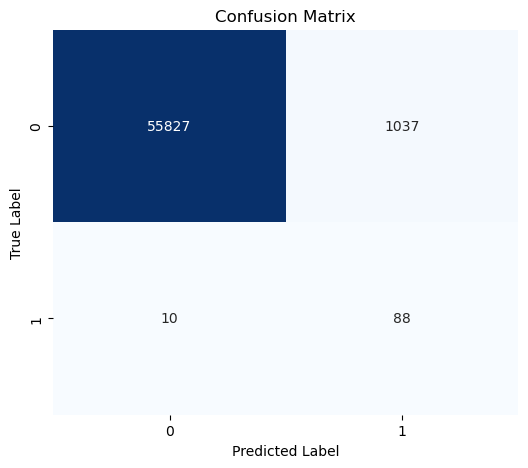

In [58]:
# Confusion matrix values
cm = confusion_matrix(y_test, y_pred_gmm)

print(cm)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **1.2 GMM + CBU**

In [59]:
model3 = LogisticRegression()
model3.fit(X_balanced, y_balanced)
y_pred_cbu_gmm = model3.predict(X_test.values)

accuracy_cbu_gmm = accuracy_score(y_test, y_pred_cbu_gmm)
precision_cbu_gmm = precision_score(y_test, y_pred_cbu_gmm)
recall_cbu_gmm = recall_score(y_test, y_pred_cbu_gmm)
f1score_cbu_gmm = f1_score(y_test, y_pred_cbu_gmm)

print("Classification_report:\n")
print ("Accuracy:  ", accuracy_cbu_gmm)
print ("Precision:  ", precision_cbu_gmm)
print ("Recall:  ", recall_cbu_gmm)
print ("F1 score:  ", f1score_cbu_gmm)

Classification_report:

Accuracy:   0.9890804395913065
Precision:   0.12571428571428572
Recall:   0.8979591836734694
F1 score:   0.22055137844611528


[[56252   612]
 [   10    88]]


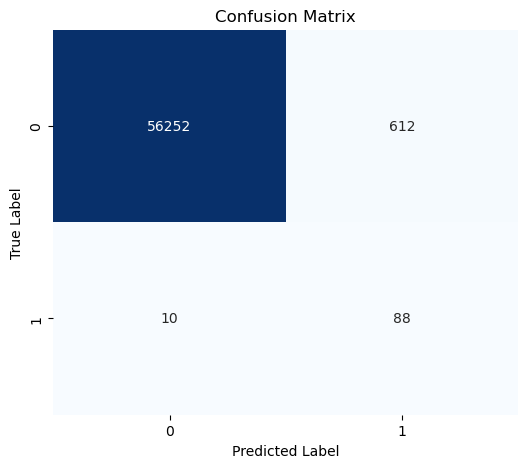

In [61]:
cm=confusion_matrix(y_test, y_pred_cbu_gmm)
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## **2. Comapritive Analysis**

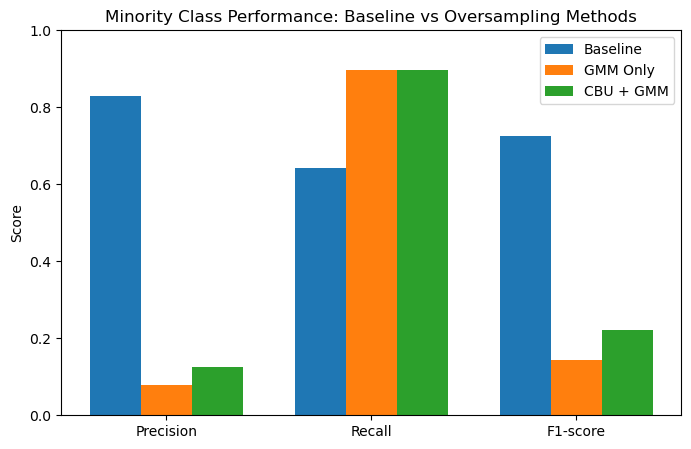

In [63]:
metrics = {
    "Baseline" : [0.8289, 0.6429  ,  0.7241 ],
    "GMM" : [precision_gmm, recall_gmm, f1score_gmm],
    "CBU_GMM" : [precision_cbu_gmm, recall_cbu_gmm, f1score_cbu_gmm]
}

labels = ["Precision", "Recall", "F1-score"]
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width, metrics["Baseline"], width, label="Baseline")
ax.bar(x, metrics["GMM"], width, label="GMM Only")
ax.bar(x + width, metrics["CBU_GMM"], width, label="CBU + GMM")

ax.set_ylabel("Score")
ax.set_title("Minority Class Performance: Baseline vs Oversampling Methods")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0,1)
plt.show()

#### **Inference**
#### Model Performance Comparison

| Model   | Accuracy | Precision | Recall | F1 Score |
|---------|---------|-----------|--------|----------|
| Baseline | 0.99  | 0.83      | 0.64   | 0.72     |
| GMM | 0.98    | 0.08      | 0.90   | 0.14     |
| GMM + CBU | 0.99    | 0.13      | 0.90   | 0.22     |
- The baseline model achieves high precision (0.83) and a reasonably strong F1-score (0.72), but its recall is limited to 0.64, meaning that over one-third of minority instances are still misclassified.
- When GMM oversampling is applied, recall increases sharply to 0.90, indicating that the model becomes far more sensitive to the minority class. However, this comes at the cost of a drastic decline in precision to just 0.08, resulting in a much lower F1-score of 0.14.
- The CBU + GMM approach shows a similar recall boost (0.89), but with improved precision (0.13), leading to a better F1-score of 0.23 compared to GMM alone.  

Overall, these results highlight a clear trade-off: the baseline favors precision and balanced performance, while GMM-based approaches prioritize recall at the expense of precision. The CBU + GMM method provides a more favorable balance between the two extremes, capturing most minority instances while limiting false positives more effectively than GMM alone.

## **3. Final Recommendation**

- **Improved Minority Detection:**  
  GMM-based synthetic data generation significantly enhances the detection of minority class instances in highly imbalanced datasets. Both GMM alone and CBU + GMM increase recall for the minority class (≈0.89–0.90), making the classifier much more sensitive to rare events compared to the baseline.

- **Trade-off with Precision:**  
  The improvement in recall comes at the cost of lower precision, resulting in more false positives and reduced F1-scores.  

- **Effect of CBU + GMM:**  
  Incorporating Cluster-Based Undersampling (CBU) before GMM helps mitigate the precision loss. This combination achieves a higher F1-score (0.23 vs 0.14 for GMM alone) by reducing the majority class dominance and allowing GMM to better model the minority distribution.

- **Theoretical Advantage of GMM:**  
  GMM captures complex, multimodal distributions within the minority class, unlike simpler methods like SMOTE, which assume linear interpolation between neighbors. This enables synthetic samples to reflect the true variability of minority sub-groups, improving model generalization.

- **Recommendation:**  
  For tasks where detecting minority instances is critical (e.g., fraud detection), GMM-based oversampling — especially when combined with CBU — is recommended. While precision may decrease, recall is substantially improved, ensuring better representation of the minority class in training data.